In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [49]:
data  = pd.read_csv('melb_data.csv')
df = pd.DataFrame(data)

In [50]:
df.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [51]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [52]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [54]:
# percentage of null values for Car, BuildingArea, YearBuilt and CouncilArea

null_a = df['Car'].isnull().sum()/df['Car'].size
print(f'Car: {null_a*100}%')
null_b = df['BuildingArea'].isnull().sum()/df['BuildingArea'].size
print(f'BuildingArea: {null_b*100}%')
null_c = df['CouncilArea'].isnull().sum()/df['CouncilArea'].size
print(f'CouncilArea: {null_c*100}%')
null_d = df['YearBuilt'].isnull().sum()/df['YearBuilt'].size
print(f'YearBuilt: {null_d*100}%')


Car: 0.45655375552282773%
BuildingArea: 47.49631811487481%
CouncilArea: 10.08100147275405%
YearBuilt: 39.58026509572901%


In [55]:
#Imputing the null values 
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')

df['Car'] = df['Car'].fillna(df['Car'].median())

df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].median())


df['CouncilArea'] = df['CouncilArea'].fillna(df['CouncilArea'].mode())


df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].mode())



In [ ]:
numerical_variables = df[['']]

In [56]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,126.0,1970.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,126.0,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


DIMENSIONALITY REDUCTION

<Axes: xlabel='Suburb', ylabel='count'>

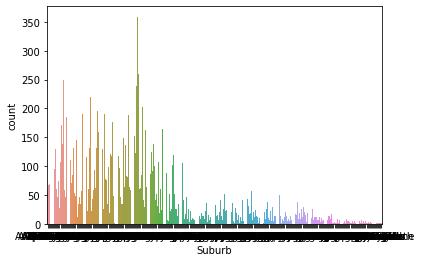

In [57]:
#countplot for 
columns = df.columns
sb.countplot(data=df, x='Suburb')

<Axes: >

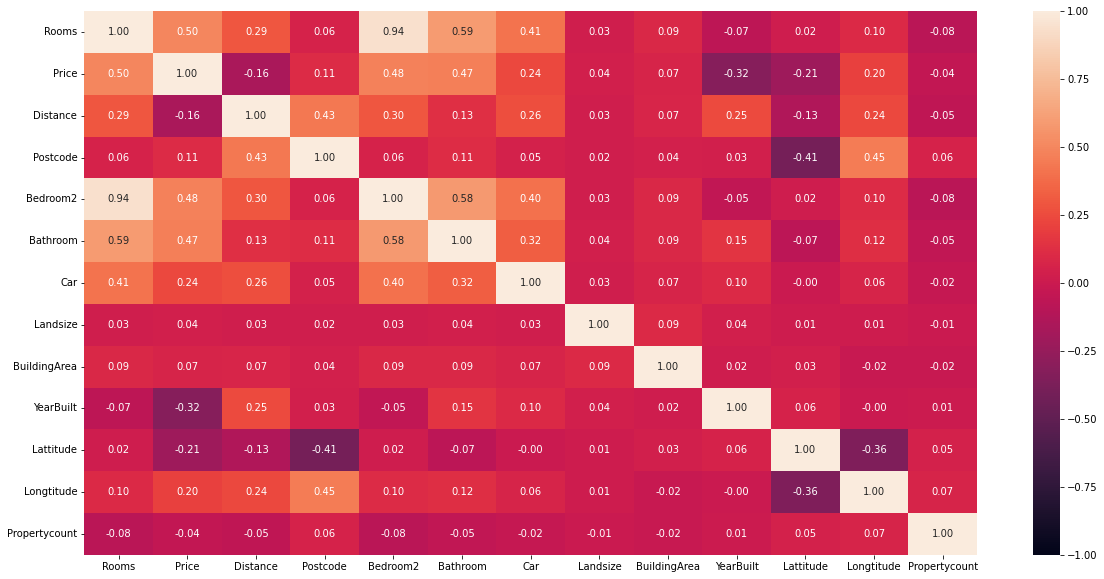

In [58]:
corr = df.corr()
f = plt.figure(figsize=(20,10))
sb.heatmap( corr, vmin=-1, vmax=1, fmt ='.2f', annot=True)

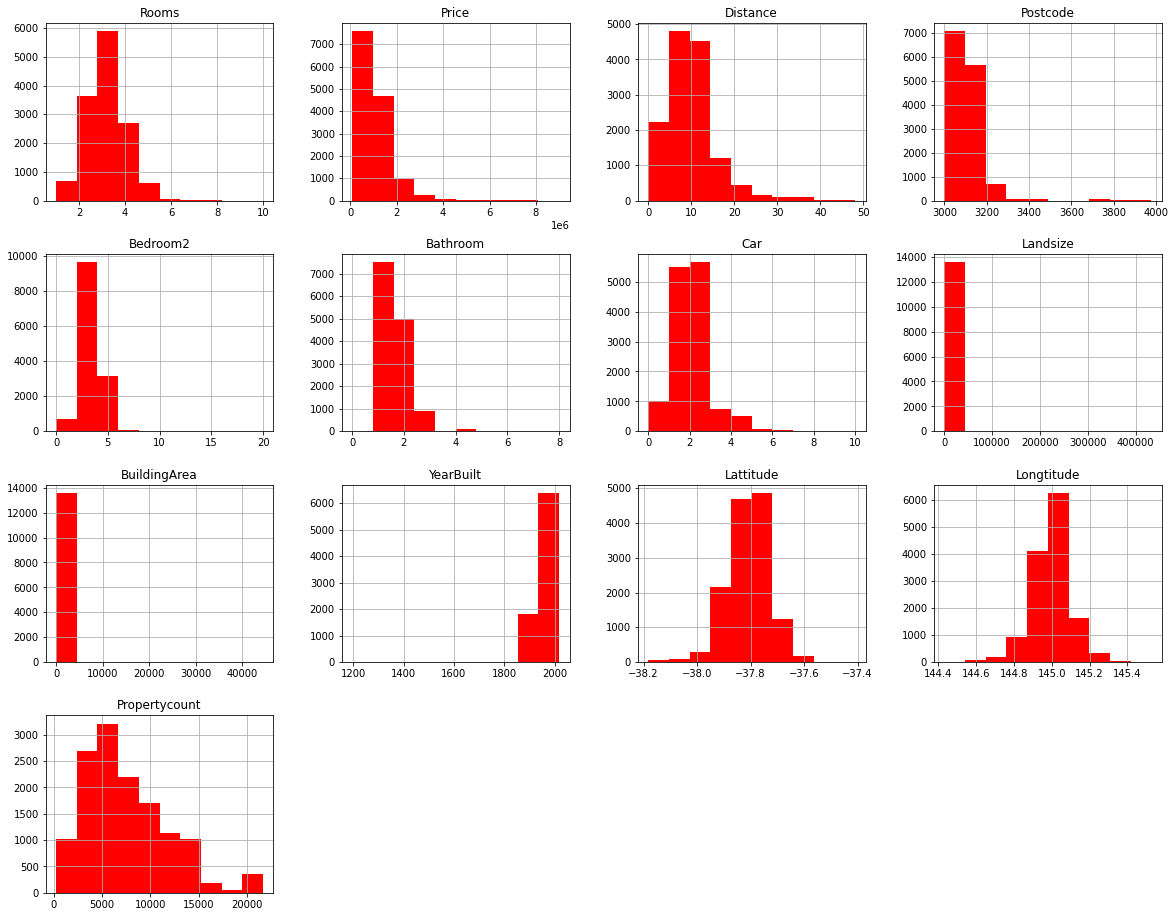

In [59]:
 #Boxplot Visualization
df.hist(figsize=(20,16), color = 'r');
plt.show()

In [60]:
for column in df.columns:
  if df[column].dtype == 'object':
    df[column].astype('string')

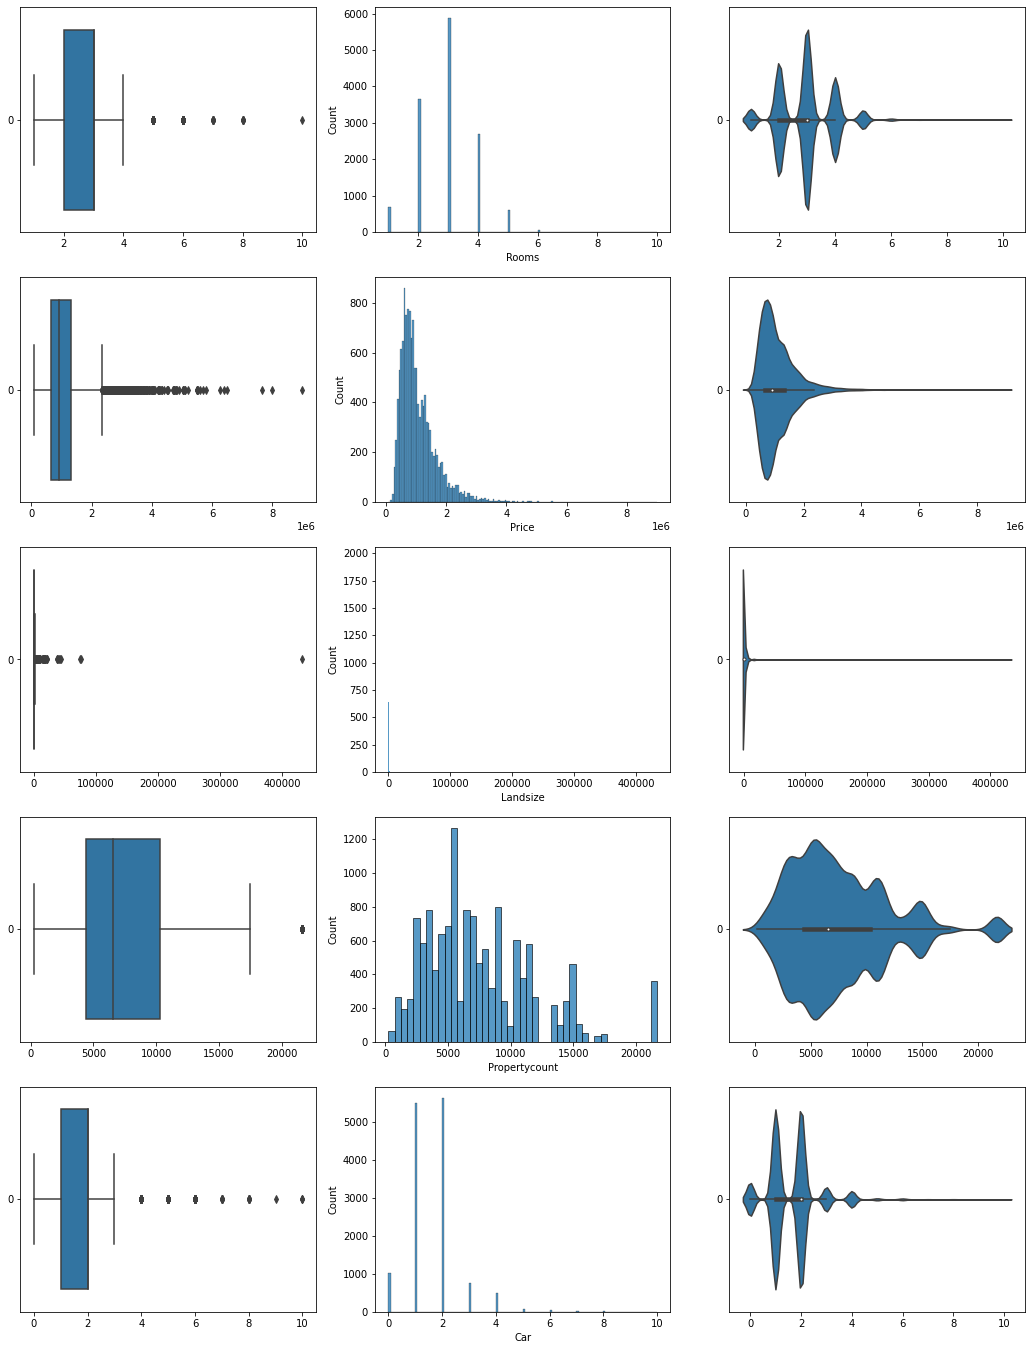

In [61]:
f, axes = plt.subplots(5, 3, figsize=(18, 24))

numeric_data = df[['Rooms','Price','Landsize', 'Propertycount', 'Car']]

count = 0
for var in numeric_data:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1

In [62]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [63]:
from sklearn.preprocessing import OneHotEncoder

In [74]:
categorical_vars = df[['Suburb', 'Method', 'Type', 'SellerG', 'CouncilArea']]

one = OneHotEncoder(handle_unknown='ignore')

categorical_vars = one.fit_transform(categorical_vars)
  

  

In [75]:
from sklearn.utils import shuffle
df = shuffle(df) # shuffling so that there is particular sequence


<ipython-input-79-c45db320d09d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['Price'], kde=True)


<Axes: xlabel='Price', ylabel='Density'>

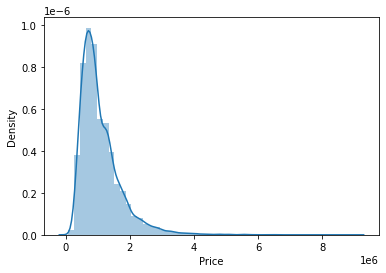

In [79]:
sb.distplot(df['Price'], kde=True)

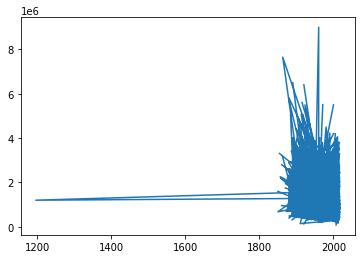

In [86]:
plt.plot(df['YearBuilt'], df['Price'])


In [103]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

<Figure size 2880x2880 with 0 Axes>

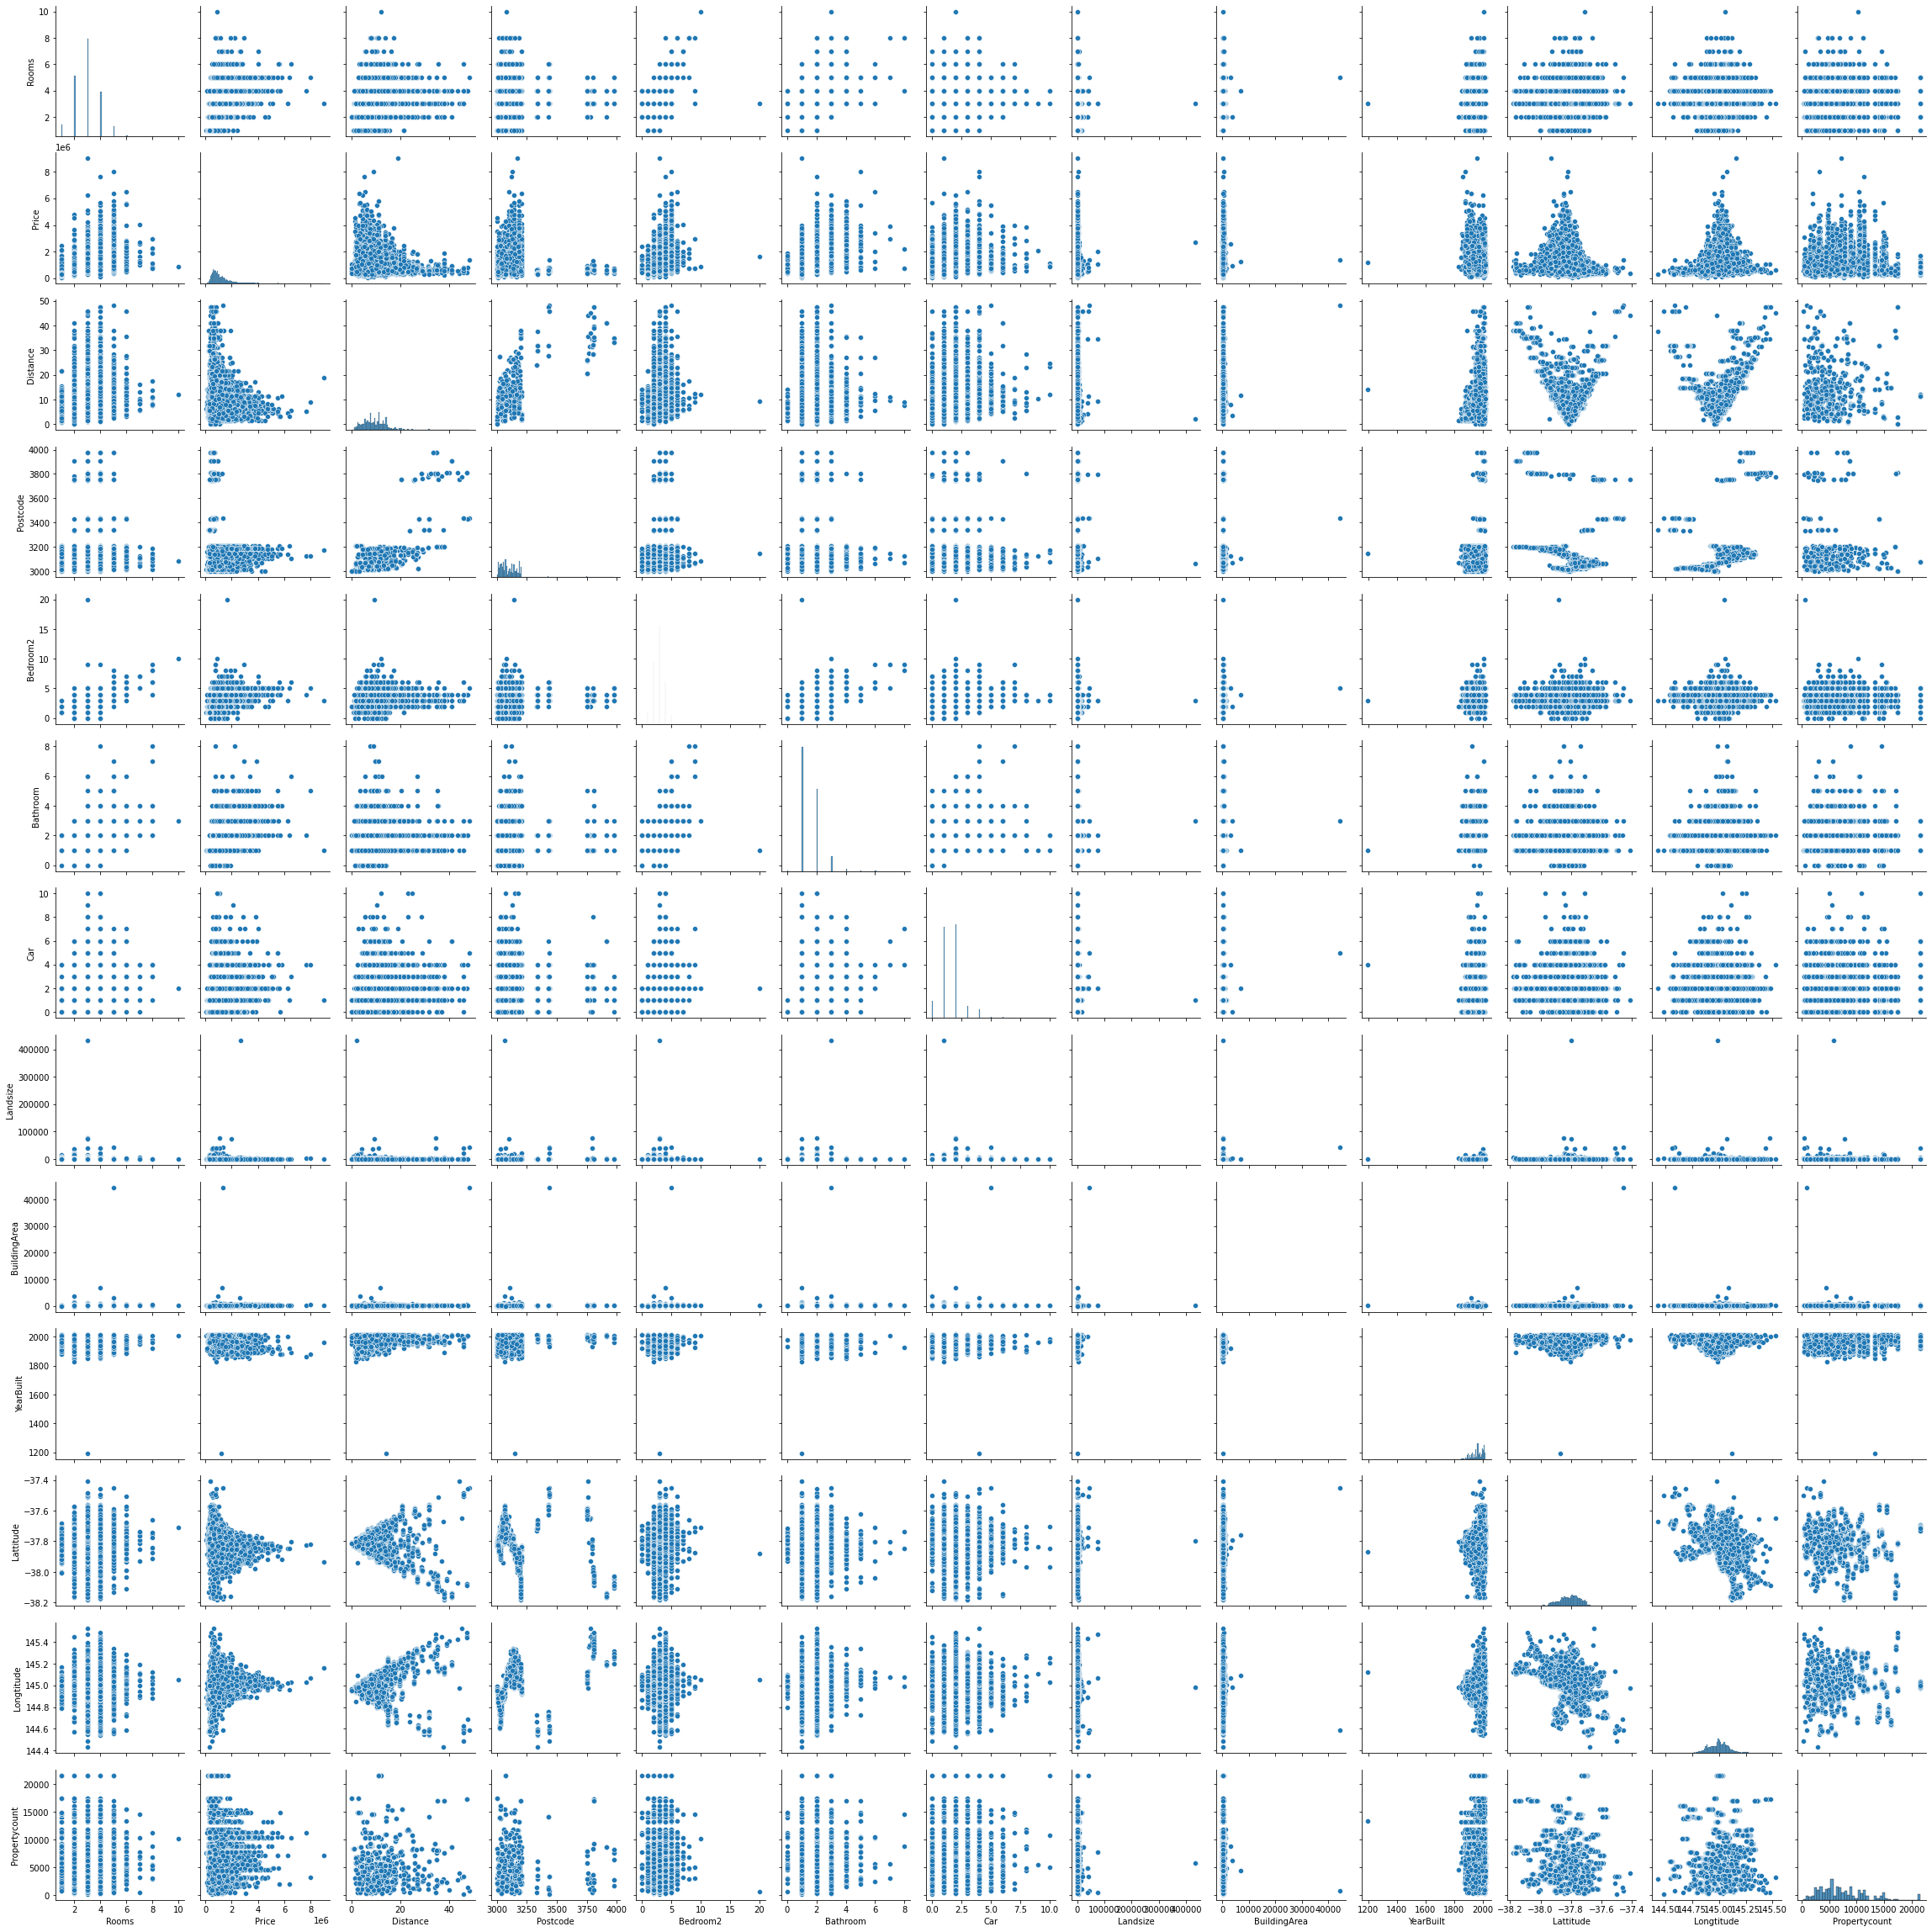

In [107]:
plt.figure(figsize=(40,40))
sb.pairplot(data= newdf)

In [ ]:
y = df['Price']
x= df.drop(['Price','CouncilArea'], axis=1)

In [ ]:
x.dtypes

Suburb             int64
Address            int64
Rooms              int64
Type               int64
Method             int64
SellerG            int64
Date               int64
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car                int64
Landsize         float64
Lattitude        float64
Longtitude       float64
Regionname         int64
Propertycount    float64
dtype: object

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fs = SelectKBest(score_func=f_classif, k=5)
# apply feature selection
X_selected = fs.fit_transform(x, y)
print(X_selected.shape)

(13580, 15)
